In [1]:
# Libraries

from bubble_equation import bubble_integrator
import numpy as np
from scipy import constants as consts

from matplotlib import pyplot as plt

In [30]:
# Physical parameters of the system
N_beam = 1e10 # e- in drive bunch
sigma_xi = 1.e-7 # m, drive bunch sigma
n_pe = 1.e19 # m^-3, plasma density
sheath_width = 1.e-9 # m, the sheath width. This is ultimately a fitting parameter

In [36]:
# Derived quantities, do not change
omega_p = np.sqrt((n_pe * consts.elementary_charge**2)/(consts.electron_mass*consts.epsilon_0))
k_p = consts.speed_of_light/omega_p
sigma_xi_hat = k_p*sigma_xi  # Lu equations normalized to plasma wavenumber
Delta = k_p * sheath_width

In [53]:
# create the bubble integrator
my_bubble = bubble_integrator(delta=Delta, sigma_xi=sigma_xi_hat, N_b=N_beam)

# how far back in xi do you need?
xis = np.linspace(-2.*np.pi, 6.*np.pi, 1000)
# An initial r_0 -- How to decide on this remains an open question - sdw
r_0 = 1.

In [54]:
bubble_radii = my_bubble.compute_bubble(xi=xis, r0=r_0)

In [55]:
print bubble_radii

[[ 1.          0.        ]
 [ 0.99970701 -0.02328709]
 [ 0.99882864 -0.04653079]
 ...
 [-0.75275875 -0.56770283]
 [-0.76689788 -0.55625248]
 [-0.7807432  -0.54434435]]


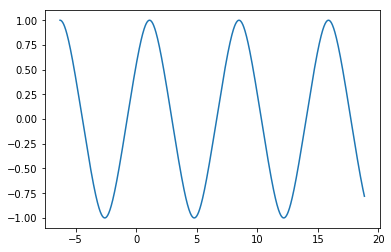

In [56]:
plt.plot(xis, bubble_radii[:,0])
plt.show()